# 渲染库Selenium

Selenium是一个自动化测试工具，利用它可以驱动浏览器来执行特定的动作，如点击、下拉等操作，同时还可以获取浏览器当前呈现的代码，做到所见即所得。对于一些JavaSript动态渲染的页面来说，此种方法非常有效。详细的介绍可以查看[教程文档](http://selenium-python.readthedocs.io/installation.html)。或者[官方文档](https://seleniumhq.github.io/selenium/docs/api/py/api.html)，也可以查看[中文文档](http://selenium-python-zh.readthedocs.io/en/latest/index.html)。

# 1. 准备工作

### 1.1 windows

**安装selenium**
+ pip install selenium
 
**安装浏览器的驱动，这里以Chrome为例**

(1)安装Chrome浏览器  
(2)下载ChromeDriver，将ChromeDriver.exe放置到环境变量里面


先查看已经安装好的Chrome的浏览器的版本，（帮助——>关于Google Chrome(G)）,点击就可以看到，如下图：
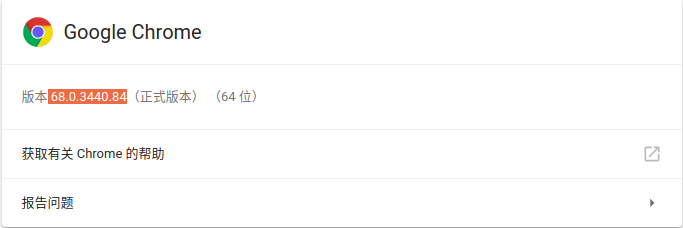我的Chrome版本为 **68.0.3440.84**

接下来查找，与68版本对应的chromedriver:

+ ChromeDriver版本:https://sites.google.com/a/chromium.org/chromedriver/  https://blog.csdn.net/huilan_same/article/details/51896672


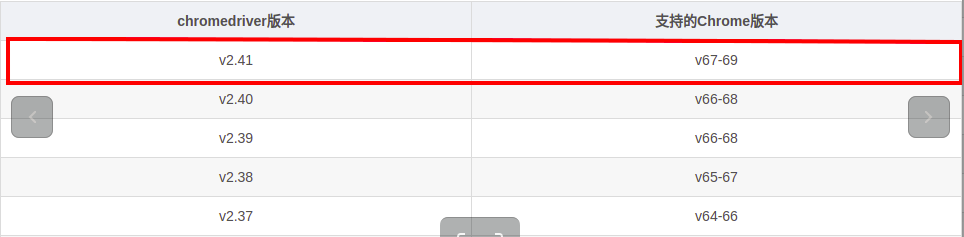

发现与Chrome浏览器68版本对应的chromedriver版本为v2.41,下载下来对应的版本进行解压

+ ChromeDriver下载：http://npm.taobao.org/mirrors/chromedriver/

**(3)** 最后将chromedriver.exe放置到python文件夹里面，或者配置环境变量。

### 1.2 Ubuntu

**(1)** 安装selenium

+ pip3 install selenium

**(2)** 下载对应的chromedriver版本

下载方法同1.1

**(3)** 配置chromedriver

a. 切换到下载文件的路径下面：
+ cd /home/uleon/下载

b. 进行解压
+ unzip chromedriver_linux64.zip

c.将解压的文件移除到/usr/bin
+ sudo mv chromedriver /usr/bin/

### 1.3 测试

进入python3环境：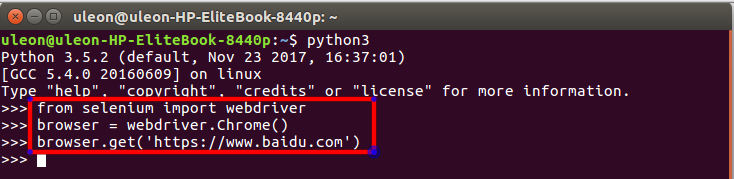

如果能正常打开Chrome浏览器，并显示‘百度’的首页，则安装成功;如果出现闪退或者报错，则chromedriver的版本安装不正确，建议重新下载安装

# 2. 基本使用

In [2]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.wait import WebDriverWait
import time

try:
    browser = webdriver.Chrome()#声明浏览器
    browser.get('https://www.baidu.com/')#输入百度网址
    inputs = browser.find_element_by_id('kw')#找到搜索框的节点
    inputs.send_keys('Python')#输入Python
    time.sleep(2)
    inputs.send_keys(Keys.ENTER)#点击确定
    wait = WebDriverWait(browser,10)
    wait.until(EC.presence_of_element_located((By.ID,'page')))#等待搜索的内容加载完成
    time.sleep(2)
#     print(browser.current_url)#获取搜索后的网页
#     print(browser.get_cookies())#获取Cookies
    print(browser.page_source)#获取网页原代码
finally:
    browser.close()

WebDriverException: Message: chrome not reachable
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.40.565498 (ea082db3280dd6843ebfb08a625e3eb905c4f5ab),platform=Windows NT 6.1.7601 SP1 x86_64)


如果用Selenium来驱动浏览器加载网页的话，就可以直接拿到JavaScript渲染的结果了，不用担心使用的是什么加密系统。

# 3. 声明浏览器对象

Selenium支持非常多的浏览器，如Chrome、Firefox、Edge等，还有Android、BlackBerry等手机端的浏览器。另外，也支持无界面浏览器PhantomJS。

进行浏览器的初始化：

In [3]:
from selenium import webdriver

browser = webdriver.Chrome()
#browser = webdriver.Firefox()
#browser = webdriver.Edge()
#browser = webdriver.Android()
#browser = webdriver.Safari()
#browser = webdriver.PhantomJS()

这样就完成了浏览器对象的初始化并将其赋值为**browser**对象。接下来，我们要做的就是调用**browser**对象，让其执行各个动作以模拟浏览器操作。

# 4. 访问网页

可以通过get()方法访问相应的网站，参数传入相应的url。另外，可以通过page_source获得经过JavaScript渲染之后的html。

<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="zh-CN" class="o2_mini csstransitions cssanimations o2_webkit o2_chrome o2_latest"><head>
  <meta charset="UTF-8" />
  <title>京东(JD.COM)-正品低价、品质保障、配送及时、轻松购物！</title>
  <meta name="description" content="京东JD.COM-专业的综合网上购物商城,销售家电、数码通讯、电脑、家居百货、服装服饰、母婴、图书、食品等数万个品牌优质商品.便捷、诚信的服务，为您提供愉悦的网上购物体验!" />
  <meta name="Keywords" content="网上购物,网上商城,手机,笔记本,电脑,MP3,CD,VCD,DV,相机,数码,配件,手表,存储卡,京东" />
  <script type="text/javascript">
    window.pageConfig = {
      compatible: true,
      preload: false,
      navId: "jdhome2016",
	  timestamp: 1543994969000, 
      isEnablePDBP: 0,
		surveyTitle : "调查问卷",
		surveyLink : "//surveys.jd.com/index.php?r=survey/index/sid/889711/newtest/Y/lang/zh-Hans",
		leftCateABtestSwitch : 0,
		"" : ""
    };
  </script>
<!--[if lte IE 7]>
    <script src="//misc.360buyimg.com/mtd/pc/index/home/ie6tip.min.js"></script>
  <![endif]-->
  <!--[if IE 8]>
    <script src="//storage.360buyimg.com/fragments/polyfill.j
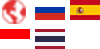
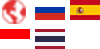
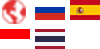
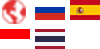
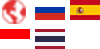

In [7]:
from selenium import webdriver
import time

browser = webdriver.Chrome()
browser.get('http://www.jd.com')
print(browser.page_source)
time.sleep(2)
browser.close()

运行后发现，弹出了Chrome浏览器并且自动访问了淘宝，然后控制台输出了淘宝页面的源代码，随后浏览器关闭。

通过这几行简单的代码，我们可以实现浏览器的驱动并获取网页源码，非常便捷。

# 5. 查找节点

Selenium可以驱动浏览器模拟各种操作，例如输入、点击等。但是在进行模拟操作时，至少应该知道操作的对象在哪。

Selenium提供了一系列查找节点的方法，我们可以用这些方法来获取想要的节点，以便下一步执行一些动作或者提取信息。

## 5.1 查找单个节点

查找单个节点，首先需要观察网站的源代码，下面以查找淘宝网站的搜索框为例：

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By

browser = webdriver.Chrome()
browser.get('https://www.taobao.com/')

input1 = browser.find_element(By.CSS_SELECTOR,'#q')
input2 = browser.find_element_by_css_selector('#q')
input3 = browser.find_element_by_class_name('search-combobox-input')
input4 = browser.find_element_by_xpath('//*[@id="q"]')
input5 = browser.find_element_by_id('q')
print(input1,input2,input3,input4,input5)
browser.close()

<selenium.webdriver.remote.webelement.WebElement (session="a9eb8ac7914a90425f6247ebaab3dffe", element="0.1178944135192388-1")> <selenium.webdriver.remote.webelement.WebElement (session="a9eb8ac7914a90425f6247ebaab3dffe", element="0.1178944135192388-1")> <selenium.webdriver.remote.webelement.WebElement (session="a9eb8ac7914a90425f6247ebaab3dffe", element="0.1178944135192388-1")> <selenium.webdriver.remote.webelement.WebElement (session="a9eb8ac7914a90425f6247ebaab3dffe", element="0.1178944135192388-1")> <selenium.webdriver.remote.webelement.WebElement (session="a9eb8ac7914a90425f6247ebaab3dffe", element="0.1178944135192388-1")>


这里我们使用3种方式获取输入框，分别是根据ID、class_name、CSS选择器和XPath获取，它们返回的结果完全一致。

这里列出所有获取单个节点的方法：

1. find_element_by_id
2. find_element_by_name
3. find_element_by_xpath
4. find_element_by_link_text
5. find_element_by_partial_link_text
6. find_element_by_tag_name
7. find_element_by_class_name
8. find_element_by_css_selector
9. **find_element**

## 5.2 查找多个节点

如果查找的目标在网页中只有一个，那么完全可以用find_element()方法。但如果有多个节点，再用find_element()方法查找，就只能得到第一个节点了。如果要查找所有满足条件的节点，需要用find_elements()这样的方法。注意，在这个方法的名称中，element多了一个s，注意区分。

依然以淘宝为例，要查找淘宝左侧导航条的所有条目：

In [13]:
from selenium import webdriver
from selenium.webdriver.common.by import By

browser = webdriver.Chrome()
browser.get('https://www.taobao.com/')
lis1 = browser.find_elements(By.CSS_SELECTOR,'.service-bd li')
# lis2 = browser.find_elements_by_css_selector('.service-bd li')
print(lis1)
# print(lis2)

browser.close()

[<selenium.webdriver.remote.webelement.WebElement (session="d304a16760d685ac2a9ddbc9c1ff040a", element="0.9853452944391417-1")>, <selenium.webdriver.remote.webelement.WebElement (session="d304a16760d685ac2a9ddbc9c1ff040a", element="0.9853452944391417-2")>, <selenium.webdriver.remote.webelement.WebElement (session="d304a16760d685ac2a9ddbc9c1ff040a", element="0.9853452944391417-3")>, <selenium.webdriver.remote.webelement.WebElement (session="d304a16760d685ac2a9ddbc9c1ff040a", element="0.9853452944391417-4")>, <selenium.webdriver.remote.webelement.WebElement (session="d304a16760d685ac2a9ddbc9c1ff040a", element="0.9853452944391417-5")>, <selenium.webdriver.remote.webelement.WebElement (session="d304a16760d685ac2a9ddbc9c1ff040a", element="0.9853452944391417-6")>, <selenium.webdriver.remote.webelement.WebElement (session="d304a16760d685ac2a9ddbc9c1ff040a", element="0.9853452944391417-7")>, <selenium.webdriver.remote.webelement.WebElement (session="d304a16760d685ac2a9ddbc9c1ff040a", element="

这里列出所有获取多个节点的方法：

1. find_elements_by_id
2. find_elements_by_name
3. find_elements_by_xpath
4. find_elements_by_link_text
5. find_elements_by_partial_link_text
6. find_elements_by_tag_name
7. find_elements_by_class_name
8. find_elements_by_css_selector
9. **find_elements**

# 6. 节点交互

上一章主要介绍如何查找节点，本章主要针对查找到节点后，需要执行一些动作。比较常见的用法有：输入文字时用send_keys()方法，清空文字时用clear()方法，点击按钮时用click()方法。

以在淘宝搜索栏中输入商品信息，点击搜索按钮为例，对整个操作进行说明：

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

browser = webdriver.Chrome()
browser.get('https://www.taobao.com/')

inputs = browser.find_element(By.CSS_SELECTOR,'#q')
inputs.send_keys('美食')#输入
time.sleep(5)
inputs.clear()#清除
inputs.send_keys('ipad')
button = browser.find_element_by_css_selector('#J_TSearchForm > div.search-button > button')
button.click()#点击
time.sleep(5)
browser.close()

通过上面的方法，我们就完成了一些常见节点的动作操作，更多的操作可以参见[官方文档](http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.common.action_chains)。

# 7. 动作链

在上一章的实例中，一些交互动作都是针对某个节点执行的。其实，还有另外一些操作，它们没有特定的执行对象，比如鼠标拖曳、键盘按键等，这些动作用另一种方式来执行，那就是动作链。

In [15]:
from selenium import webdriver
from selenium.webdriver import ActionChains
 
browser = webdriver.Chrome()
url = 'http://www.runoob.com/try/try.php?filename=jqueryui-api-droppable'
browser.get(url)
browser.switch_to.frame('iframeResult')
source = browser.find_element_by_css_selector('#draggable')
target = browser.find_element_by_css_selector('#droppable')
actions = ActionChains(browser)#声明动作链
actions.drag_and_drop(source, target)
actions.perform()
browser.close()
# browser.switch_to.defaultContent()
# browser.find_element_by_css_selector('.navbar-header.logo')

更多的动作链操作可浏览[官方文档](http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.common.action_chains)。

# 8. 执行JavaScript

对于某些操作，Selenium API并没有提供。比如，下拉进度条，它可以直接模拟运行JavaScript，此时使用execute_script()方法即可实现，代码如下：

In [23]:
from selenium import webdriver
 
browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
#browser.execute_script('window.scrollTo(0, document.body.scrollHeight)')
browser.execute_script('window.scrollTo(0, 1000)')
browser.execute_script('alert("已经到底了！！")')

这里就利用execute_script()方法将进度条下拉到最底部，然后弹出alert提示框。

所以说有了这个方法，基本上API没有提供的所有功能都可以用执行JavaScript的方式来实现了。

# 9. 获取节点信息

前面说过，通过page_source属性可以获取网页的源代码，接着就可以使用解析库（如正则表达式、Beautiful Soup、pyquery等）来提取信息了。

不过，既然Selenium已经提供了选择节点的方法，返回的是WebElement类型，那么它也有相关的方法和属性来直接提取节点信息，如属性、文本等。这样的话，我们就可以不用通过解析源代码来提取信息了，非常方便。

## 9.1 获取属性

我们可以使用get_attribute()方法来获取节点的属性，但是其前提是先选中这个节点，示例如下：

In [28]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
img = browser.find_element_by_css_selector('#zu-top-add-question')
print(img)
print(img.get_attribute('class'))
print(img.text)
browser.close()

<selenium.webdriver.remote.webelement.WebElement (session="d171bc3d8df7583c3478089592f5f2f2", element="0.9067473722529944-1")>
zu-top-add-question
提问


通过get_attribute()方法，然后传入想要获取的属性名，就可以得到它的值了。

## 9.2 获取文本

每个WebElement节点都有text属性，直接调用这个属性就可以得到节点内部的文本信息

In [25]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
inputs = browser.find_element_by_class_name('zu-top-add-question')
print(inputs.text)
browser.close()

提问


## 9.3 获取id、位置、标签名和大小

另外，WebElement节点还有一些其他属性，比如id属性可以获取节点id，location属性可以获取该节点在页面中的相对位置，tag_name属性可以获取标签名称，size属性可以获取节点的大小，也就是宽高，这些属性有时候还是很有用的。示例如下：

In [26]:
from selenium import webdriver
 
browser = webdriver.Chrome()
url = 'https://www.zhihu.com/explore'
browser.get(url)
inputs = browser.find_element_by_class_name('zu-top-add-question')
print(inputs.id)
print(inputs.location)
print(inputs.tag_name)
print(inputs.size)
browser.close()

0.5552985696185955-1
{'x': 760, 'y': 7}
button
{'height': 32, 'width': 66}


# 10. 延时等待

在Selenium中，get()方法会在网页框架加载结束后结束执行，此时如果获取page_source，可能并不是浏览器完全加载完成的页面，如果某些页面有额外的Ajax请求，我们在网页源代码中也不一定能成功获取到。所以，这里需要延时等待一定时间，确保节点已经加载出来。

这里等待的方式有两种：一种是隐式等待，一种是显式等待。

## 10.1 隐式等待

当使用隐式等待执行测试的时候，如果Selenium没有在DOM中找到节点，将继续等待，超出设定时间后，则抛出找不到节点的异常。换句话说，当查找节点而节点并没有立即出现的时候，隐式等待将等待一段时间再查找DOM，默认的时间是0。示例如下：

In [33]:
from selenium import webdriver
 
browser = webdriver.Chrome()
browser.implicitly_wait(10)#隐式等待
browser.get('https://www.zhihu.com/explore')
inputs = browser.find_element_by_id('aaaa')
print(inputs)

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"id","selector":"aaaa"}
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.40.565498 (ea082db3280dd6843ebfb08a625e3eb905c4f5ab),platform=Windows NT 6.1.7601 SP1 x86_64)


这里我们用implicitly_wait()方法实现了隐式等待。

## 10.2 显式等待

隐式等待的效果其实并没有那么好，因为我们只规定了一个固定时间，而页面的加载时间会受到网络条件的影响。

这里还有一种更合适的显式等待方法，它指定要查找的节点，然后指定一个最长等待时间。如果在规定时间内加载出来了这个节点，就返回查找的节点；如果到了规定时间依然没有加载出该节点，则抛出超时异常。示例如下：

In [34]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

b = webdriver.Chrome()
b.get('http://www.baidu.com')
wait = WebDriverWait(b,10)#显式等待

input=wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR,'#su')))
print(input.get_attribute('value'))

百度一下


关于等待条件，其实还有很多，比如判断标题内容，判断某个节点内是否出现了某文字等。下表列出了所有的等待条件：

|等待条件|含义|
|-:|:-| 
|title_is|标题是某内容|
|title_contains|标题包含某内容|
|presence_of_element_located|节点加载出来，传入定位元组，如(By.ID, 'p')|
|visibility_of_element_located|节点可见，传入定位元组|
|visibility_of|可见，传入节点对象|
|presence_of_all_elements_located|所有节点加载出来|
|text_to_be_present_in_element|某个节点文本包含某文字|
|text_to_be_present_in_element_value|某个节点值包含某文字|
|frame_to_be_available_and_switch_to_it|加载并切换|
|invisibility_of_element_located|节点不可见|
|element_to_be_clickable|节点可点击|
|staleness_of|判断一个节点是否仍在DOM，可判断页面是否已经刷新|
|element_to_be_selected|节点可选择，传节点对象|
|element_located_to_be_selected|节点可选择，传入定位元组|
|element_selection_state_to_be|传入节点对象以及状态，相等返回True，否则返回False|
|element_located_selection_state_to_be|传入定位元组以及状态，相等返回True，否则返回False|
|alert_is_present|是否出现警告|

更多的操作可以参考[官方文档](http://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.support.expected_conditions)。

# 11. 前进和后退

平常使用浏览器时都有前进和后退功能，Selenium也可以完成这个操作，它使用back()方法后退，使用forward()方法前进。示例如下：

In [35]:
import time
from selenium import webdriver
 
browser = webdriver.Chrome()
browser.get('https://www.taobao.com/')
time.sleep(1)
browser.get('https://www.baidu.com/')
time.sleep(1)
browser.get('https://www.douban.com/')
time.sleep(1)
browser.back()
time.sleep(1)
browser.forward()
time.sleep(1)
browser.close()

这里我们连续访问3个页面，然后调用back()方法回到第二个页面，接下来再调用forward()方法又可以前进到第三个页面。

# 12. Cookies

使用Selenium，还可以方便地对Cookies进行操作，例如获取、添加、删除Cookies等。示例如下：

In [40]:
from selenium import webdriver
 
browser = webdriver.Chrome()
browser.get('https://www.zhihu.com/explore')
print(browser.get_cookies())#获取Cookies
browser.add_cookie({'name': 'name', 'domain': 'www.zhihu.com', 'value': '+++++++++++'})#添加cookie
print(browser.get_cookies())
browser.delete_all_cookies()#清空Cookies
print(browser.get_cookies())
browser.close()

[{'domain': '.zhihu.com', 'httpOnly': False, 'name': 'l_n_c', 'path': '/', 'secure': False, 'value': '1'}, {'domain': 'www.zhihu.com', 'expiry': 1547178650.490314, 'httpOnly': False, 'name': 'tgw_l7_route', 'path': '/', 'secure': False, 'value': '060f637cd101836814f6c53316f73463'}, {'domain': '.zhihu.com', 'expiry': 1547179558, 'httpOnly': False, 'name': '__utmb', 'path': '/', 'secure': False, 'value': '51854390.0.10.1547177758'}, {'domain': '.zhihu.com', 'expiry': 1641785751.490486, 'httpOnly': False, 'name': 'q_c1', 'path': '/', 'secure': False, 'value': 'e5c5af5fc13e480e8a5675cf381c2dfa|1547177754000|1547177754000'}, {'domain': 'www.zhihu.com', 'httpOnly': False, 'name': '_xsrf', 'path': '/', 'secure': False, 'value': '827eedd496c90475c778390e2ab6ed64'}, {'domain': '.zhihu.com', 'expiry': 1549769750.490589, 'httpOnly': False, 'name': 'r_cap_id', 'path': '/', 'secure': False, 'value': '"M2RiMTI0ODNmZDc4NGU0OGFhZTFiNThkMjE5MGQxZmM=|1547177753|fe7739d3a5e6c1c32983b293f6c01f6f6e97b2e9"'

# 13. 选项卡管理

在访问网页的时候，会开启一个个选项卡。在Selenium中，我们也可以对选项卡进行操作。示例如下：

In [5]:
import time
from selenium import webdriver
 
browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
print(browser.window_handles)
browser.execute_script('window.open()')#打开一个选项卡
print(browser.window_handles)
browser.switch_to_window(browser.window_handles[1])#切换到1
browser.get('https://www.taobao.com')
time.sleep(1)
browser.switch_to_window(browser.window_handles[0])
browser.get('https://www.douban.com/')
browser.close()
browser.switch_to_window(browser.window_handles[0])
browser.close()

['CDwindow-F03A31F7099846BF00E899E71CFBB679']
['CDwindow-F03A31F7099846BF00E899E71CFBB679', 'CDwindow-12916ECA42ED24757D0BA79AD270A667']


D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: use driver.switch_to.window instead
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: use driver.switch_to.window instead
  if sys.path[0] == '':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: use driver.switch_to.window instead
  from ipykernel import kernelapp as app


要想切换选项卡，只需要调用switch_to_window()方法即可，其中参数是选项卡的代号。

# 14. 异常处理 

在使用Selenium的过程中，难免会遇到一些异常，例如超时、节点未找到等错误，一旦出现此类错误，程序便不会继续运行了。这里我们可以使用try except语句来捕获各种异常。

In [10]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('https://www.baidu.com')
browser.find_element_by_id('hello')
browser.close()

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"id","selector":"hello"}
  (Session info: chrome=68.0.3440.106)
  (Driver info: chromedriver=2.38.552522 (437e6fbedfa8762dec75e2c5b3ddb86763dc9dcb),platform=Windows NT 6.1.7601 SP1 x86_64)


可以看到，这里抛出了NoSuchElementException异常，这通常是节点未找到的异常。为了防止程序遇到异常而中断，我们需要捕获这些异常，示例如下：

In [11]:
from selenium import webdriver
from selenium.common.exceptions import TimeoutException, NoSuchElementException
 
browser = webdriver.Chrome()
try:
    browser.get('https://www.baidu.com')
except TimeoutException:
    print('Time Out')
try:
    browser.find_element_by_id('hello')
except NoSuchElementException:
    print('No Element')
finally:
    browser.close()

No Element


关于更多的异常类，可以参考[官方文档](http://selenium-python.readthedocs.io/api.html#module-selenium.common.exceptions)。

# 7. 实战演练

用Selenium来模拟浏览器操作，抓取京东的商品信息：
+ 用Selenium来模拟浏览器，获取代码
+ 通过BeautifulSoup来解析获得商品的信息（图片、标题、价格、购买人数、店铺等）
+ 用MongoDB进行数据存储